<a href="https://colab.research.google.com/github/fpakpour/FatemehRep/blob/master/Copy_of_Delay_Nofunc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import imageio
import json
import os
import cv2
#import winsound
import itertools 
from PIL import Image
from tqdm import tqdm
from scipy.special import gammainc
from mpl_toolkits.mplot3d import Axes3D 
from mpl_toolkits import mplot3d
from datetime import datetime
start_time = datetime.now()

In [ ]:
dl=5
N=1000
L0=10.0
rho=np.round(N/(L0**3),2)
v0=0.1
r=1.0
# r_rep=0
# r_att=0
# c_align=1.0
# c_rep=0.1
# c_att=0
eta=0.02
q=1
dt=1.0
T=500
# strict=False
# VEM=True
# CHM=False
# DHM=False
# SHM=False
# DHMZ=False
# SHMZ=False

txt_VEM='VEM, Preiodic_BC, N='+str(N)+', L='+str(L0)+', T='+str(T)+', rho='+str(rho)+', r='+str(r)+', v0='+str(v0)+', eta='+str(eta)+', q='+str(q)+', Delay='+str(dl)+' time steps'
# txt_CHM='CHM, Periodic_BC, N='+str(N)+', L='+str(L0)+', T='+str(T)+', rho='+str(rho)+', r='+str(r)+', v0='+str(v0)+', eta='+str(eta)
# txt_DHM='DHM, Periodic_BC, N='+str(N)+', L='+str(L0)+', T='+str(T)+', rho='+str(rho)+', r='+str(r)+', v0='+str(v0)+', eta='+str(eta)
# txt_SHM='SHM, Preiodic_BC, N='+str(N)+', L='+str(L0)+', T='+str(T)+', rho='+str(rho)+', r='+str(r)+', v0='+str(v0)+', eta='+str(eta)+', q='+str(q)
# txt_DHMZ='DHMZ, Preiodic_BC, N='+str(N)+', L='+str(L0)+', T='+str(T)+', rho='+str(rho)+', r='+str(r)+', v0='+str(v0)+', eta='+str(eta)+', q='+str(q)
# txt_SHMZ='SHMZ, Preiodic_BC, N='+str(N)+', L='+str(L0)+', T='+str(T)+', rho='+str(rho)+', r='+str(r)+', v0='+str(v0)+', eta='+str(eta)+', q='+str(q)

In [ ]:
X=np.zeros((T,N,3))
U=np.zeros((T,N,3))

In [ ]:
#Defining particles initial positions
X[0,:,:]=np.random.uniform(low=0, high=L0, size=(N,3))

#Defining particles initial velocity vectors
U[0,:,:]=np.random.normal(0,1.0, size=(N,3))

#Normalization of the velocity vectors to the magnitude of the velocity(v0)
norm_U=np.sqrt(np.sum(U[0,:,:]**2, axis=1)).reshape(N,1)
U[0,:,:]=v0*U[0,:,:]/norm_U

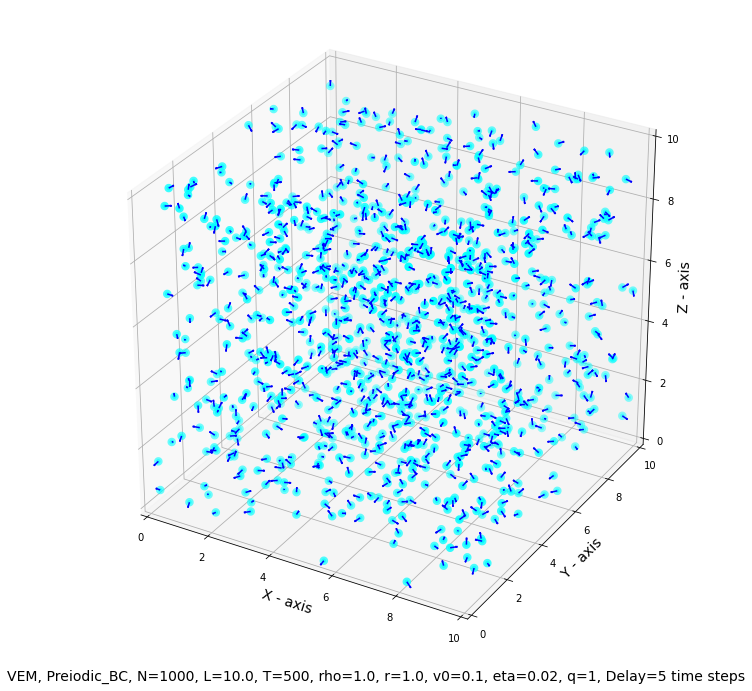

In [ ]:
#Ploting Particles
fig = plt.figure(figsize=[12,12])
ax = fig.add_subplot(projection='3d')
#ax.view_init(0, 180) #this is used for changing the view

ax.set_xlabel('X - axis', fontsize=14)
ax.set_ylabel('Y - axis', fontsize=14)
ax.set_zlabel('Z - axis', fontsize=14)

ax.scatter(X[0,:,0],X[0,:,1],X[0,:,2], linewidths=4, color='cyan')

#Ploting velocity vectors
ax.quiver(X[0,:,0],X[0,:,1],X[0,:,2], 2*U[0,:,0],2*U[0,:,1],2*U[0,:,2], color='blue')

#Caption of the video
fig.text(.5, .1, txt_VEM, ha='center',fontsize=14, linespacing=0.1)

plt.xlim(0,L0)
plt.ylim(0,L0)
ax.set_zlim3d([0,L0])

#Saving first frame in a file
plt.savefig('frame_n'+str(eta)+'_VEM0.png') 
  
plt.show()

In [ ]:
#Center for generated noise
center = np.array([0,0,0])
#Order parameter data initializing
data_order_p=np.zeros((T,3))

In [ ]:
#Calculation of the initial order parameter
Sum_U=np.zeros((1,3))
    
for j in range(3):
    for i in range(N):
        Sum_U[0,j] += U[0,i,j]
        
order_p = np.abs(Sum_U/N)/v0

data_order_p[0]=order_p
# print(data_order_p[0])

In [ ]:
#Calculation of noise
def noise_vector(center, eta, N): 
    
    ndim = center.size
    X_noise = np.random.normal(size=(N, ndim))
    Xsq = np.sum(X_noise**2,axis=1)
    fr = eta*gammainc(ndim/2,Xsq/2)**(1/ndim)/np.sqrt(Xsq)
    frtiled = np.tile(fr.reshape(N,1),(1,ndim))
    noise = center + np.multiply(X_noise,frtiled)
    
    return noise

In [ ]:
#Calculation of order parameter
def order_parameter(U_align,k):
    Sum_U=np.zeros((1,3))
    
    for j in range(3):
        for i in range(N):
            Sum_U[0,j] += U_align[i,j]
               
    order_p = np.abs(Sum_U/N)/v0
    
    return order_p    

In [ ]:
#Ploting
def Simulation_plot(k, X, U_align):
    fig = plt.figure(figsize=[12,12])
    ax = fig.add_subplot(projection='3d')
    #ax.view_init(0, 180)  
    ax.set_xlabel('X - axis', fontsize=14)
    ax.set_ylabel('Y - axis', fontsize=14)
    ax.set_zlabel('Z - axis', fontsize=14)
    
    ax.scatter(X[:,0],X[:,1],X[:,2], linewidths=4, color='cyan')
 
    ax.quiver(X[:,0],X[:,1],X[:,2], 2*U_align[:,0], 2*U_align[:,1], 2*U_align[:,2],color='blue')

         
    fig.text(.5, .1, txt_VEM, ha='center',fontsize=14, linespacing=0.1)
  
    
    plt.xlim(0,L0)
    plt.ylim(0,L0)
    ax.set_zlim3d(0,L0)
   
    plt.savefig('frame_n'+str(eta)+'_VEM'+str(k+1)+'.png')
        
    plt.close()   

In [ ]:
#Definition of C and B matrices
C = np.ones((N,N))*q
B = np.ones((N,N))
# if strict==True:
#     for i in range(N):
#         B[i,i]=0
        
##print(B)
##print(C)

for k in tqdm(range(dl)):
    
    box_index=np.zeros(N)
    neighbours=np.zeros((N,27))
    f_X=np.floor(X)
    
    for i in range(N):
        string0=str(int(f_X[k,i,0]/r))+str(int(f_X[k,i,1]/r))+str(int(f_X[k,i,2]/r))
        box_index[i]=int(string0)
        
    
    for i in range(N):
        neighbours[i,0]=box_index[i]
        neighbours[i,1]=box_index[i]+100
        neighbours[i,2]=box_index[i]+110
        neighbours[i,3]=box_index[i]+10
        neighbours[i,4]=box_index[i]-90
        neighbours[i,5]=box_index[i]-100
        neighbours[i,6]=box_index[i]-110
        neighbours[i,7]=box_index[i]-10
        neighbours[i,8]=box_index[i]+90
        
        neighbours[i,9]=box_index[i]+1
        neighbours[i,10]=box_index[i]+101
        neighbours[i,11]=box_index[i]+111
        neighbours[i,12]=box_index[i]+11
        neighbours[i,13]=box_index[i]-89
        neighbours[i,14]=box_index[i]-99
        neighbours[i,15]=box_index[i]-109
        neighbours[i,16]=box_index[i]-9
        neighbours[i,17]=box_index[i]+91
        
        neighbours[i,18]=box_index[i]-1
        neighbours[i,19]=box_index[i]+99
        neighbours[i,20]=box_index[i]+109
        neighbours[i,21]=box_index[i]+9
        neighbours[i,22]=box_index[i]-91
        neighbours[i,23]=box_index[i]-101
        neighbours[i,24]=box_index[i]-111
        neighbours[i,25]=box_index[i]-11
        neighbours[i,26]=box_index[i]+89
    
    ##print('neighbours=', neighbours)
    A = np.zeros((N,N))
    L = np.zeros((N,N))        
    Ds = np.zeros((N,N))
    n=np.zeros((N)) 
    

    for i in range(N):
        for j in range(27):
            neighbouring_point=np.where(neighbours[i,j]==box_index)
            neighbouring_points=list(itertools.chain(*neighbouring_point))
            for m in neighbouring_points:
                Ds[i,m] = np.sqrt(np.sum((X[k,i]-X[k,m])**2, axis=0))
                if Ds[i,m] <= r:
                    A[i,m] = 1
                    n[i]+=1
    ##print('A=',A)
   
    ##print('n=',n)
    for i in range(N):
        for j in range(N):
            L[i,j] = C[i,j]*B[i,j]*A[i,j]
    #print('L=',L)       
    ntiled = np.tile(n.reshape(N,1),(1,3))
    ##print('ntiled=',ntiled)
    ##print('k=', k)
    ##print('U[k,:,:]=', U[k,:,:]) 
    #print('U_av_1=', np.matmul(L,U[k,:,:]))
    U_av = (1/ntiled)*np.matmul(L,U[k,:,:])
    #print('U_av=', U_av)
    
    noise = noise_vector(center, eta, N)
    ##print('noise=',noise)
    
    U_av = U_av + noise
    ##print('U[k,:,:]=', U[k,:,:]) 
    
    norm_U = np.sqrt(np.sum(U_av**2, axis=1)).reshape(N,1)
    ##print('norm_U=', norm_U)
     
    norm_Utiled = np.tile(norm_U,3).reshape(N,3)
    ##print('||U||=', norm_Utiled)
                      
    U_align = v0*U_av/norm_Utiled
    ##print('U_align=', U_align)
  

    #Updating particles positions
    X[k+1,:,:] = X[k,:,:] + U_align*dt
        
    #Applying periodic boundary conditions. X%Lo gives the remainder after dividing X by L0
    X[k+1,:,:]=X[k+1,:,:]%L0
    ##print('X=', X[k+1,:,:])    
    #Updating velocities
    U[k+1,:,:]=U_align
    #print('U_align=', U[k+1,:,:])   
    #Ploting
    Simulation_plot(k,X[k+1,:,:],U_align)
    #print('X=', X)
    #print('U=', U)
    #Calculation of the order parameter
    order_p = order_parameter(U_align,k)
    data_order_p[k+1]=order_p    


100%|██████████| 5/5 [00:12<00:00,  2.41s/it]


In [ ]:
for k in tqdm(range(dl, T-1)):
    
    box_index=np.zeros(N)
    neighbours=np.zeros((N,27))
   
    for i in range(N):
        string0=str(int(np.floor(X[k-dl,i,0]/r)))+str(int(np.floor(X[k-dl,i,1]/r)))+str(int(np.floor(X[k-dl,i,2]/r)))
        box_index[i]=int(string0)
        
    
    for i in range(N):
        neighbours[i,0]=box_index[i]
        neighbours[i,1]=box_index[i]+100
        neighbours[i,2]=box_index[i]+110
        neighbours[i,3]=box_index[i]+10
        neighbours[i,4]=box_index[i]-90
        neighbours[i,5]=box_index[i]-100
        neighbours[i,6]=box_index[i]-110
        neighbours[i,7]=box_index[i]-10
        neighbours[i,8]=box_index[i]+90
        
        neighbours[i,9]=box_index[i]+1
        neighbours[i,10]=box_index[i]+101
        neighbours[i,11]=box_index[i]+111
        neighbours[i,12]=box_index[i]+11
        neighbours[i,13]=box_index[i]-89
        neighbours[i,14]=box_index[i]-99
        neighbours[i,15]=box_index[i]-109
        neighbours[i,16]=box_index[i]-9
        neighbours[i,17]=box_index[i]+91
        
        neighbours[i,18]=box_index[i]-1
        neighbours[i,19]=box_index[i]+99
        neighbours[i,20]=box_index[i]+109
        neighbours[i,21]=box_index[i]+9
        neighbours[i,22]=box_index[i]-91
        neighbours[i,23]=box_index[i]-101
        neighbours[i,24]=box_index[i]-111
        neighbours[i,25]=box_index[i]-11
        neighbours[i,26]=box_index[i]+89
    
    ##('neighbours=', neighbours)
    A = np.zeros((N,N))
    L = np.zeros((N,N))        
    Ds = np.zeros((N,N))
    n=np.zeros((N)) 
    U_av_2= np.zeros((N,3))
    

    for i in range(N):
        for j in range(27):
            neighbouring_point=np.where(neighbours[i,j]==box_index)
            neighbouring_points=list(itertools.chain(*neighbouring_point))
            for m in neighbouring_points:
                Ds[i,m] = np.sqrt(np.sum((X[k-dl,i]-X[k-dl,m])**2, axis=0))
                if Ds[i,m] <= r:
                    A[i,m] = 1
                    n[i]+=1
    #('n=', n)
                     
    for i in range(N):
        for j in range(N):
            L[i,j] = C[i,j]*B[i,j]*A[i,j]
     
           
    #('L=',L)   
    ##('k=',k)
    ##('U[k-dl,:,:]=', U[k-dl,:,:])
    ntiled = np.tile(n.reshape(N,1),(1,3))
    #('ntiled=',ntiled)
    
    U_av_1 = np.matmul(L,U[k-dl,:,:])
    #('U_av_1=', U_av_1)
    #('U_align=', U_align)
    for i in range(N):
        for j in range(3):
            U_av_2[i,j] = U_av_1[i,j] - L[i,i]*U[k-dl,i,j] + L[i,i]*U[k,i,j]
            
    U_av=U_av_2/ntiled
    #('U_av_2=', U_av_2)        
    #('U_av=', U_av)        
    noise = noise_vector(center, eta, N)
    #('noise=', noise)
    U_av = U_av + noise
    #('U_av=', U_av)
    ##('U[k,:,:]=', U[k,:,:]) 
    
    norm_U = np.sqrt(np.sum(U_av**2, axis=1)).reshape(N,1)
    ##('norm_U=', norm_U)
     
    norm_Utiled = np.tile(norm_U,3).reshape(N,3)
    ##('norm_Utiled=', norm_Utiled)
                      
    U_align = v0*U_av/norm_Utiled
    #('U_align=', U_align)
  

    #Updating particles positions
    X[k+1,:,:] = X[k,:,:] + U_align*dt
    ##('X=', X[k+1,:,:])    
    #Applying periodic boundary conditions. X%Lo gives the remainder after dividing X by L0
    X[k+1,:,:]=X[k+1,:,:]%L0
        
    #Updating velocities
    U[k+1,:,:]=U_align
    ##('U_align=', U[k+1,:,:])  
      
    #('X=', X)
    #('U=', U)
    
    #Ploting
    Simulation_plot(k,X[k+1,:,:],U_align)
    
    #Calculation of the order parameter 
    order_p = order_parameter(U_align,k)
    data_order_p[k+1]=order_p    



 19%|█▉        | 95/494 [04:12<19:32,  2.94s/it]

In [ ]:
#Save order parameters components in the files
np.savetxt('op_VEM_x_'+str(N)+'_D'+str(dl)+'_n'+str(eta)+'.txt', data_order_p[:,0]) 
np.savetxt('op_VEM_y_'+str(N)+'_D'+str(dl)+'_n'+str(eta)+'.txt', data_order_p[:,1]) 
np.savetxt('op_VEM_z_'+str(N)+'_D'+str(dl)+'_n'+str(eta)+'.txt', data_order_p[:,2])


In [ ]:
import cv2
import os#Making video
image_folder = ''
video_name = 'VEM'+str(N)+'_D'+str(dl)+'_n'+str(eta)+'.mp4'
images=['frame_n'+str(eta)+'_VEM'+str(k)+'.png' for k in range(T-1)]
   

        
frame=cv2.imread(os.path.join(image_folder, images[0]))
height, width, layers = frame.shape
video = cv2.VideoWriter(video_name, 0, 15, (width,height))

for image in images:
    video.write(cv2.imread(os.path.join(image_folder, image)))

cv2.destroyAllWindows()
video.release()

In [ ]:
x = np.arange(0,T)
y1 = data_order_p[:,0]
y2 = data_order_p[:,1]
y3 = data_order_p[:,2]
plt.title("Order parameter, N="+str(N)+",  T="+str(T)+",  eta="+str(eta)+",  Dt="+str(dl))
plt.ylabel("Order parameter") 
plt.xlabel("Time") 
plt.plot(x, y1, 'b', label='op_x')
plt.plot(x, y2, 'r', label='op_y')
plt.plot(x, y3, 'g', label='op_z')
plt.legend()
plt.show()

In [ ]:
# frequency = 1500  # Set Frequency To 1500 Hertz
# duration = 500  # Set Duration To 500 ms == 0.5 second
# winsound.Beep(frequency, duration) 

In [ ]:
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))